In [3]:
import logging

from numpy.random import RandomState
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import fetch_olivetti_faces
from sklearn import cluster
from sklearn import decomposition
import cv2
import zipfile
import numpy as np
import matplotlib.pyplot as plt


In [4]:


faces = {}
with zipfile.ZipFile("./yalefaces_cropped.zip") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith(".pgm"):
            continue
        with facezip.open(filename) as image:
            faces[filename] = cv2.imdecode(np.frombuffer(
                image.read(), np.uint8), cv2.IMREAD_GRAYSCALE)


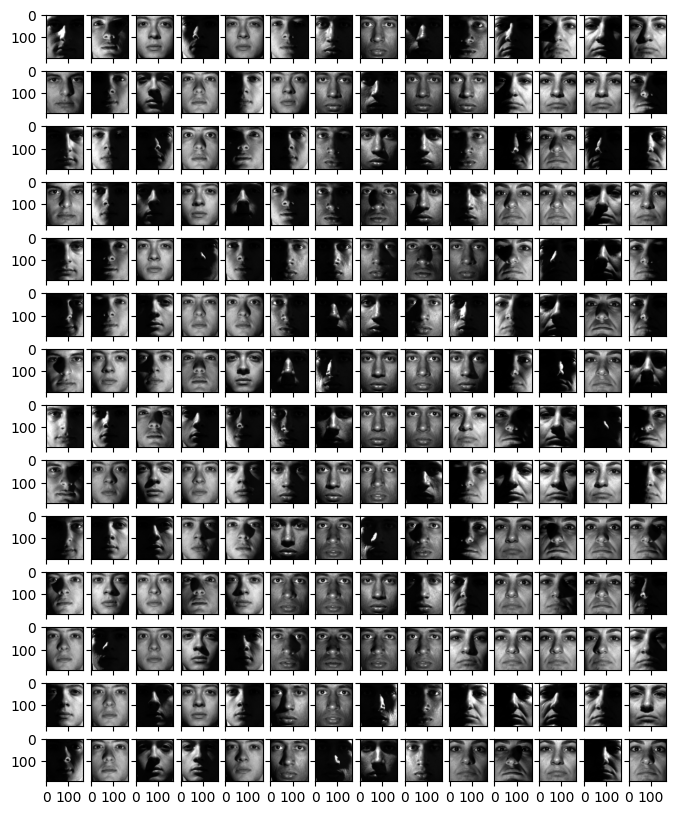

In [5]:


fig, axes = plt.subplots(14, 14, sharex=True, sharey=True, figsize=(8, 10))
faceimages = list(faces.values())[-196:]  # take last 196 images
for i in range(196):
    axes[i % 14][i//14].imshow(faceimages[i], cmap="gray")
plt.show()


In [6]:

faceshape = list(faces.values())[0].shape
print("Face image shape:", faceshape)


Face image shape: (192, 168)


In [7]:

import os
directory = "./CroppedYale/"
classes = set(os.listdir(directory))
print("Number of classes:", len(classes))
print("Number of pictures:", len(faces))


Number of classes: 38
Number of pictures: 2414


In [8]:


import numpy
import cv2 as cv
image = []
list = []
path = './CroppedYale/'

for root, dirs, files in os.walk(path):
    print(root)
    for _dir in dirs:
        print(_dir)
    for _file in files:
        if _file.endswith(".pgm"):
            image = set(_file.split("_"))
            print(image)


./CroppedYale/
yaleB01
yaleB02
yaleB03
yaleB04
yaleB05
yaleB06
yaleB07
yaleB08
yaleB09
yaleB10
yaleB11
yaleB12
yaleB13
yaleB15
yaleB16
yaleB17
yaleB18
yaleB19
yaleB20
yaleB21
yaleB22
yaleB23
yaleB24
yaleB25
yaleB26
yaleB27
yaleB28
yaleB29
yaleB30
yaleB31
yaleB32
yaleB33
yaleB34
yaleB35
yaleB36
yaleB37
yaleB38
yaleB39
./CroppedYale/yaleB01
{'P00A+000E+00.pgm', 'yaleB01'}
{'P00A+000E+20.pgm', 'yaleB01'}
{'yaleB01', 'P00A+000E+45.pgm'}
{'P00A+000E+90.pgm', 'yaleB01'}
{'yaleB01', 'P00A+000E-20.pgm'}
{'P00A+000E-35.pgm', 'yaleB01'}
{'yaleB01', 'P00A+005E+10.pgm'}
{'P00A+005E-10.pgm', 'yaleB01'}
{'yaleB01', 'P00A+010E+00.pgm'}
{'yaleB01', 'P00A+010E-20.pgm'}
{'yaleB01', 'P00A+015E+20.pgm'}
{'yaleB01', 'P00A+020E+10.pgm'}
{'yaleB01', 'P00A+020E-10.pgm'}
{'yaleB01', 'P00A+020E-40.pgm'}
{'yaleB01', 'P00A+025E+00.pgm'}
{'P00A+035E+15.pgm', 'yaleB01'}
{'yaleB01', 'P00A+035E+40.pgm'}
{'yaleB01', 'P00A+035E+65.pgm'}
{'yaleB01', 'P00A+035E-20.pgm'}
{'yaleB01', 'P00A+050E+00.pgm'}
{'P00A+050E-40.pgm'

In [9]:


facematrix = []
facelabel = []
for key, val in faces.items():
    if key.startswith("yaleB"):
        continue
    if key == "yaleB33":
        continue
    facematrix.append(val.flatten())
    facelabel.append(key.split("/")[0])
facematrix = np.array(facematrix)


In [ ]:
facematrix = tf.tensor(facematrix)

In [10]:
# number of features and the number of samples
n_samples, n_features = facematrix.shape
print(n_samples)
print(n_features)


2414
32256


In [18]:
# spliting into train and test
split_1 = int(0.8 * len(facematrix))
split_2 = int(0.9 * len(facematrix))
split_3 = int(0.9 * len(facematrix))

train_X = facematrix[:split_1]
train_y = facematrix[split_1:split_2]
test_y = facematrix[split_3:]


In [19]:
print(train_X.shape)
print(train_y.shape)
print(test_y.shape)


(1931, 32256)
(241, 32256)
(242, 32256)


In [21]:
faces_centered = facematrix - facematrix.mean(axis=0)

# Local centering (focus on one sample, centering all features)
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)


Dataset consists of 2414 faces


In [20]:

n_row, n_col = 20, 30
n_components = n_row * n_col


In [23]:
pca_estimator = decomposition.PCA(
    n_components=n_components, svd_solver="randomized", whiten=True
)
pca_trained = pca_estimator.fit(faces_centered)


In [24]:
pca_trained


PCA(n_components=600, svd_solver='randomized', whiten=True)

In [25]:

eigenfaces = pca_estimator.components_[:n_components]


In [26]:
print(len(eigenfaces))


600


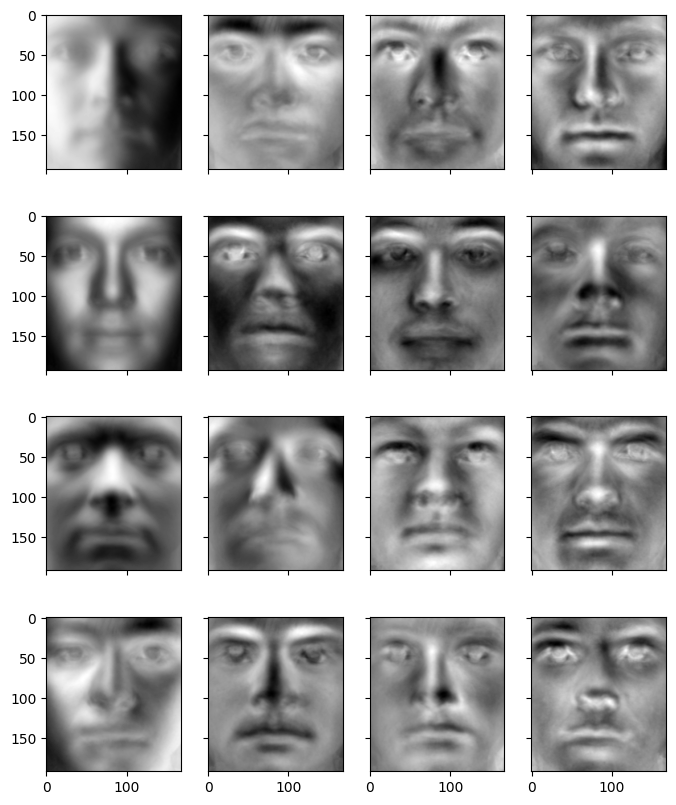

In [27]:
# Show the first 16 eigenfaces
fig, axes = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(8, 10))
for i in range(16):
    axes[i % 4][i//4].imshow(eigenfaces[i].reshape(faceshape), cmap="gray")
plt.show()


### Truncated SVD


In [34]:

from sklearn.decomposition import TruncatedSVD
# the truncated SVD
data = facematrix.copy()
svd = TruncatedSVD(n_components=50, n_iter=7, random_state=42)
truncated_svd_train = svd.fit(data)


In [44]:

import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import os

plt.rcParams['figure.figsize'] = [16, 6]
plt.rcParams.update({'font.size': 18})

# Define randomized SVD function


def rSVD(X, r, q, p):
    # Step 1: Sample column space of X with P matrix
    ny = X.shape[1]
    P = np.random.randn(ny, r+p)
    Z = X @ P
    for k in range(q):
        Z = X @ (X.T @ Z)

    Q, R = np.linalg.qr(Z, mode='reduced')

    # Step 2: Compute SVD on projected Y = Q.T @ X
    Y = Q.T @ X
    UY, S, VT = np.linalg.svd(Y, full_matrices=0)
    U = Q @ UY

    return U, S, VT


In [45]:

path = "./CroppedYale/"

A = imread("./CroppedYale/yaleB01/yaleB01_P00A+000E+00.pgm")
# X = np.mean(A,axis=2) # Convert RGB -> grayscale

U, S, VT = np.linalg.svd(A, full_matrices=0)  # Deterministic SVD

r = 400  # Target rank
q = 1   # Power iterations
p = 5   # Oversampling parameter

#rU, rS, rVT = rSVD(X,r,q,p)


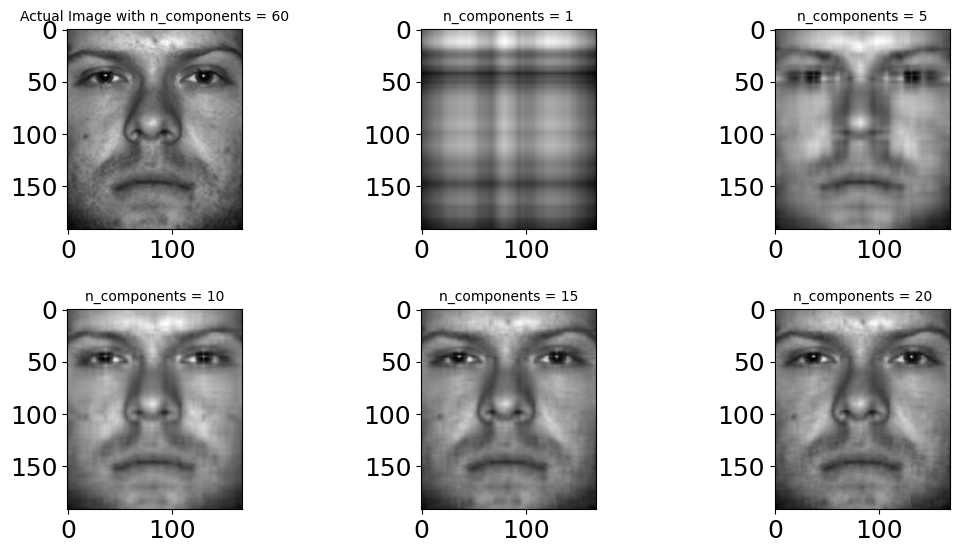

In [52]:

# plot images with different number of components
comps = [60, 1, 5, 10, 15, 20]
plt.figure(figsize=(12, 6))

for i in range(len(comps)):
    low_rank = U[:, :comps[i]] @ np.diag(S[:comps[i]]) @ VT[:comps[i], :]

    if (i == 0):
        plt.subplot(2, 3, i+1),
        plt.subplots_adjust(left=0.1,
                            bottom=0.1,
                            right=0.9,
                            top=0.9,
                            wspace=0.4,
                            hspace=0.4)
        fig.tight_layout()
        plt.imshow(low_rank, cmap='gray'),
        plt.title(f'Actual Image with n_components = {comps[i]}', fontsize=10)

    else:
        plt.subplot(2, 3, i+1),
        plt.subplots_adjust(left=0.1,
                            bottom=0.1,
                            right=0.9,
                            top=0.9,
                            wspace=0.4,
                            hspace=0.4)
        fig.tight_layout()
        plt.imshow(low_rank, cmap='gray'),
        plt.title(f'n_components = {comps[i]}', fontsize=10)


In [47]:
# the start of the face recognition
from time import time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.utils.fixes import loguniform


In [50]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)


In [53]:

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [57]:

n_components = 150

print(
    "Extracting the top %d eigenfaces from %d faces" % (
        n_components, X_train.shape[0])
)
t0 = time()
svd_truncated = TruncatedSVD(n_components=n_components).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = svd_truncated.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = svd_truncated.transform(X_train)
X_test_pca = svd_truncated.transform(X_test)
print("done in %0.3fs" % (time() - t0))


Extracting the top 150 eigenfaces from 966 faces
done in 5.361s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.026s


In [58]:

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)


Fitting the classifier to the training set
done in 10.122s
Best estimator found by grid search:
SVC(C=6928.354361186056, class_weight='balanced', gamma=0.0004368358829546839)


Predicting people's names on the test set
done in 0.223s
                   precision    recall  f1-score   support

     Ariel Sharon       0.86      0.92      0.89        13
     Colin Powell       0.89      0.90      0.89        60
  Donald Rumsfeld       0.73      0.59      0.65        27
    George W Bush       0.87      0.96      0.91       146
Gerhard Schroeder       0.60      0.60      0.60        25
      Hugo Chavez       0.64      0.47      0.54        15
       Tony Blair       0.79      0.61      0.69        36

         accuracy                           0.83       322
        macro avg       0.77      0.72      0.74       322
     weighted avg       0.82      0.83      0.82       322



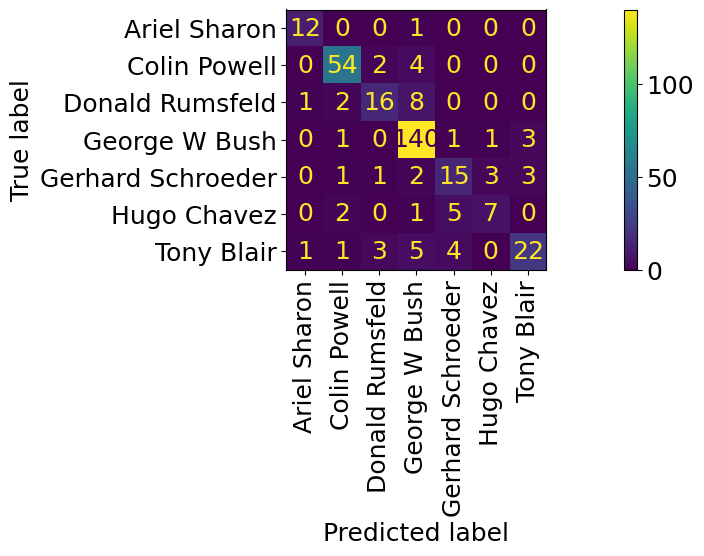

In [59]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(
    clf, X_test_pca, y_test, display_labels=target_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()


In [60]:

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


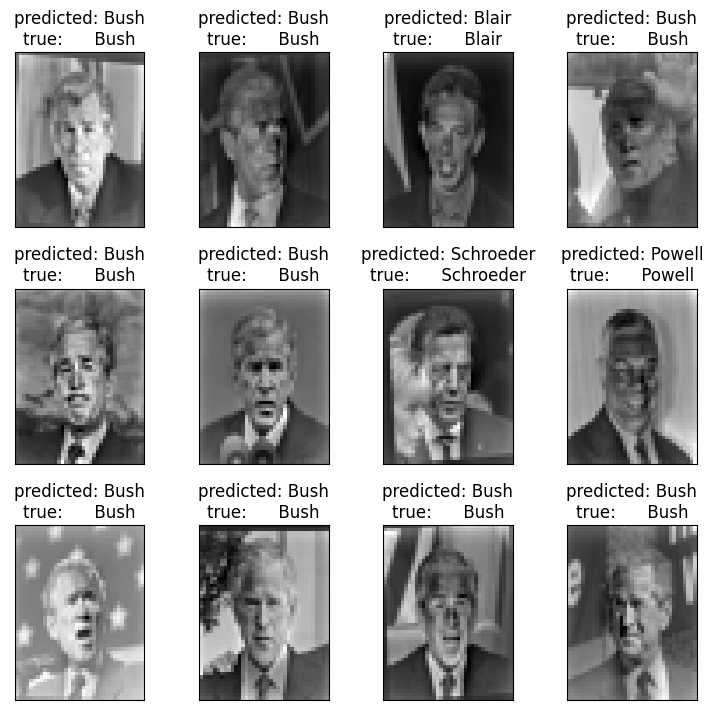

In [61]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(" ", 1)[-1]
    true_name = target_names[y_test[i]].rsplit(" ", 1)[-1]
    return "predicted: %s\ntrue:      %s" % (pred_name, true_name)


prediction_titles = [
    title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])
]

plot_gallery(X_test, prediction_titles, h, w)
